# Group Project 
## Consumer Confidence Questions: Income and Spending Data 
### 1. Is there a correlation between willingness to buy and the right time to make a large purchase? 
### 2. What is the difference in consumer confidence between Summer and Winter? 
### 3. What variable has the greatest effect on Consumer Confidence?
### 4. Is there a difference in Consumer Confidence in a post-Covid Netherlands?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats 
from scipy.stats import shapiro
import statsmodels.api as sm 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import mannwhitneyu

## Data Frame

In [2]:
df = pd.read_csv("data.csv", sep = ";") 
df

,ID,Periods,ConsumerConfidence_1,EconomicClimate_2,WillingnessToBuy_3,EconomicSituationLast12Months_4,EconomicSituationNext12Months_5,FinancialSituationLast12Months_6,FinancialSituationNext12Months_7,RightTimeToMakeLargePurchases_8
0,0,1986MM04,2,6,0,6,5,0,1,-1
1,1,1986MM05,8,17,1,17,16,1,5,-2
2,2,1986MM06,15,33,3,35,30,2,11,-5
3,3,1986MM07,20,45,4,49,41,4,12,-6
4,4,1986MM08,21,47,4,53,41,7,14,-7
...,...,...,...,...,...,...,...,...,...,...
430,430,2022MM02,-30,-46,-20,-61,-31,-21,-8,-30
431,431,2022MM03,-39,-58,-26,-60,-57,-23,-18,-36
432,432,2022MM04,-48,-69,-34,-73,-65,-33,-24,-44
433,433,2022MM05,-47,-68,-33,-78,-58,-33,-16,-50


## Visualisation

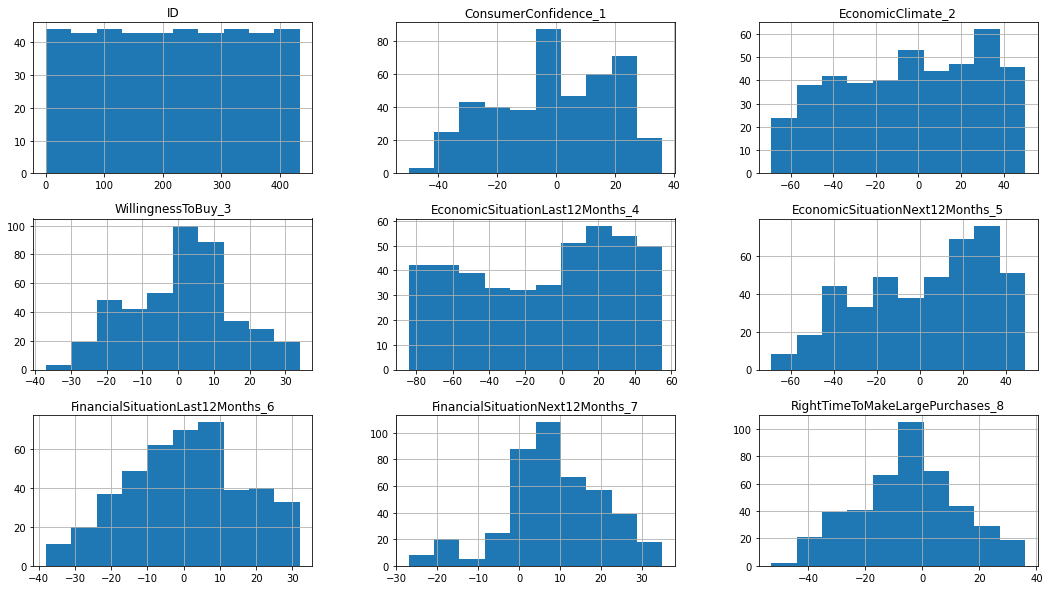

In [3]:
df.hist(figsize = (18,10))
plt.show()

## Descriptive Statistics

In [4]:
df.describe()

,ID,ConsumerConfidence_1,EconomicClimate_2,WillingnessToBuy_3,EconomicSituationLast12Months_4,EconomicSituationNext12Months_5,FinancialSituationLast12Months_6,FinancialSituationNext12Months_7,RightTimeToMakeLargePurchases_8
count,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,217.000000,-0.71954,-3.466667,1.131034,-9.367816,2.360920,-0.089655,8.413793,-4.937931
std,125.717938,19.68647,32.942705,14.250033,41.821134,29.216195,16.328109,12.031786,18.078765
min,0.000000,-50.00000,-69.000000,-37.000000,-84.000000,-69.000000,-38.000000,-27.000000,-53.000000
25%,108.500000,-16.00000,-31.500000,-9.000000,-49.000000,-20.000000,-12.000000,1.000000,-16.000000
50%,217.000000,-1.00000,-2.000000,2.000000,-2.000000,8.000000,0.000000,9.000000,-5.000000
75%,325.500000,15.00000,26.000000,10.000000,27.000000,28.000000,11.000000,17.000000,6.000000
max,434.000000,36.00000,50.000000,34.000000,55.000000,49.000000,32.000000,35.000000,36.000000


## Normality Tests - Shapiro Wilk
H0 - Data are from a Gaussian 

In [5]:
for norm in df.columns[2:]: 
    stat, p = shapiro(df[norm]) 
    print(f"{norm}: \nStatistic = {stat}, p-value = {p:.2f}")
    alpha = 0.05
    if p > alpha: 
        print('Data are normally distributed ')
    else:
        print('Null rejected. Data are NOT normally distributed') 
    print('')
        

ConsumerConfidence_1: 
Statistic = 0.9731143116950989, p-value = 0.00
Null rejected. Data are NOT normally distributed

EconomicClimate_2: 
Statistic = 0.9490646123886108, p-value = 0.00
Null rejected. Data are NOT normally distributed

WillingnessToBuy_3: 
Statistic = 0.9885289072990417, p-value = 0.00
Null rejected. Data are NOT normally distributed

EconomicSituationLast12Months_4: 
Statistic = 0.9336261749267578, p-value = 0.00
Null rejected. Data are NOT normally distributed

EconomicSituationNext12Months_5: 
Statistic = 0.9464060068130493, p-value = 0.00
Null rejected. Data are NOT normally distributed

FinancialSituationLast12Months_6: 
Statistic = 0.9845120906829834, p-value = 0.00
Null rejected. Data are NOT normally distributed

FinancialSituationNext12Months_7: 
Statistic = 0.9825707077980042, p-value = 0.00
Null rejected. Data are NOT normally distributed

RightTimeToMakeLargePurchases_8: 
Statistic = 0.990050196647644, p-value = 0.00
Null rejected. Data are NOT normally di

## Normality Test - QQ Plot 

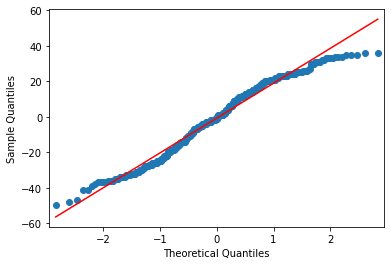

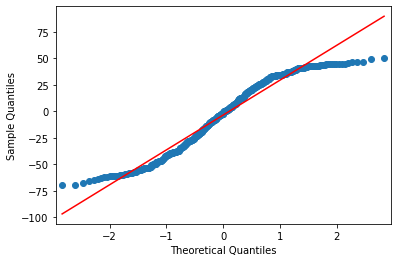

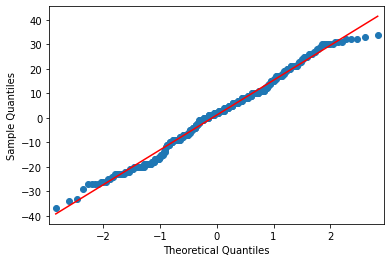

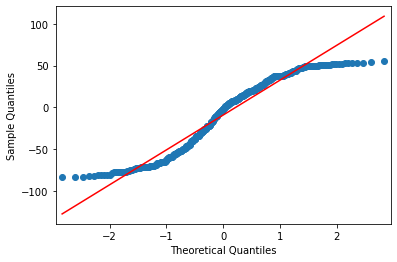

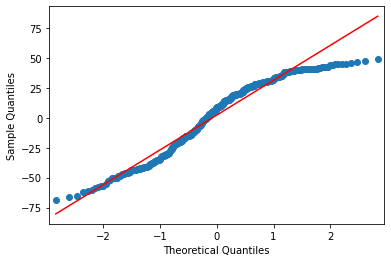

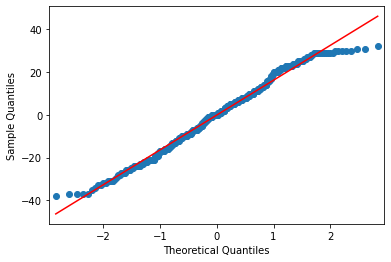

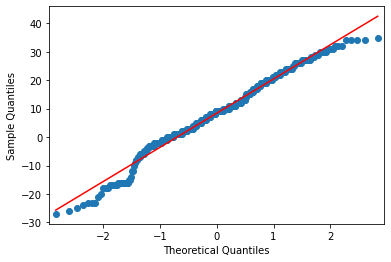

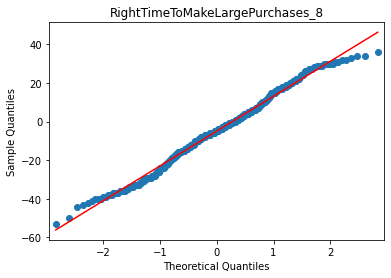

In [6]:
for norm in df.columns[2:]: 
    qqplot(df[norm], line='s')
    
plt.title(norm)
plt.show()

### Above tests suggest that data are not normally distributed, hence use non-parametric statistics 

# 1. Is there a correlation between willingness to buy and the right time to make a large purchase? 

Correlation Coefficient: 0.90, p-value 0.000


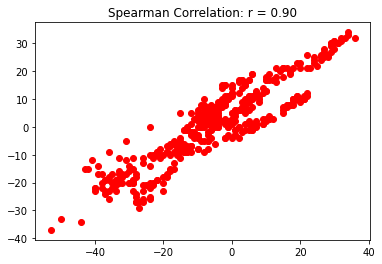

In [7]:
###Spearman Correlation (Non-parametric) ###

#assigning variables 
x = df['RightTimeToMakeLargePurchases_8']
y = df['WillingnessToBuy_3']

#Calculating Correlation 
spear = stats.spearmanr(x,y)
print(f'Correlation Coefficient: {spear[0]:.2f}, p-value {spear[1]:.3f}')

#Plotting
plt.plot(x,y,'ro')
plt.title(f'Spearman Correlation: r = {spear[0]:.2f}')
plt.show()

# 2. What is the difference in consumer confidence between Summer and Winter?

In [8]:
###  What is the difference in consumer confidence between Summer and Winter?

def season(month):
    
    """
    The function will return the season based on the the last 2 digits of the objects in the column 'Periods'.
    endswith() is a function that compares the end of a string with the given argument. 
    Gives a warning if the last characters are not between '01' and '12'
    """
    
    for period in df['Periods']:
        if month.endswith("12") or month.endswith("01") or month.endswith("02"):
            return "winter"
        elif month.endswith("03") or month.endswith("04") or month.endswith("05"):
            return "spring"
        elif month.endswith("06") or month.endswith("07") or month.endswith("08"):
            return "summer"
        elif month.endswith("09") or month.endswith("10") or month.endswith("11"):
            return "autumn"
        else:
            print("Check for wrong object in df['Periods'].")


df['season'] = df['Periods'].apply(season) # new column 'season' is created and is filled with return from method season()

print(df[['Periods', 'season']].head(12), "\n")

df_winter = df.loc[df['season'] == 'winter']

df_spring = df.loc[df['season'] == 'spring']

df_summer = df.loc[df['season'] == 'summer']

df_autumn = df.loc[df['season'] == 'autumn']


print(f"winter:\n{df_winter['ConsumerConfidence_1'].describe()}\n")
print(f"summer:\n{df_summer['ConsumerConfidence_1'].describe()}")

# similar variances (std**2)

# test for normal distribution:

normal_df_winter = shapiro(df_winter['ConsumerConfidence_1'])
normal_df_summer = shapiro(df_summer['ConsumerConfidence_1'])

print(f"\nwinter: {normal_df_winter}\nsummer: {normal_df_summer}")

# null hypothesis is that the data are normally distributed, but it is rejected for both. p < 0.05 (0.018, 0.003)


# Wilcoxon matched-pairs signed-ranks test:

df_summer = df_summer[:-1] # to get same size as df_winter for Wilcoxon test

stats.wilcoxon(df_winter['ConsumerConfidence_1'], df_summer['ConsumerConfidence_1']) #have to have the same length

# pvalue > 0.05 They are NOT significantly different


     Periods  season
0   1986MM04  spring
1   1986MM05  spring
2   1986MM06  summer
3   1986MM07  summer
4   1986MM08  summer
5   1986MM09  autumn
6   1986MM10  autumn
7   1986MM11  autumn
8   1986MM12  winter
9   1987MM01  winter
10  1987MM02  winter
11  1987MM03  spring 

winter:
count    108.000000
mean      -1.074074
std       19.476179
min      -41.000000
25%      -16.250000
50%       -2.000000
75%       17.250000
max       36.000000
Name: ConsumerConfidence_1, dtype: float64

summer:
count    109.000000
mean      -0.064220
std       19.984381
min      -50.000000
25%      -16.000000
50%        1.000000
75%       15.000000
max       34.000000
Name: ConsumerConfidence_1, dtype: float64

winter: ShapiroResult(statistic=0.9709053039550781, pvalue=0.018050573766231537)
summer: ShapiroResult(statistic=0.9659687876701355, pvalue=0.006881622597575188)


WilcoxonResult(statistic=2561.5, pvalue=0.4796397914099034)

### The above test returned a non significant p-value. This suggests that there are no differences in consumer confidence between summer and winter

# 3. What variable has the greatest effect on Consumer Confidence?

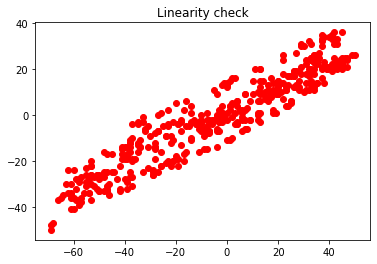

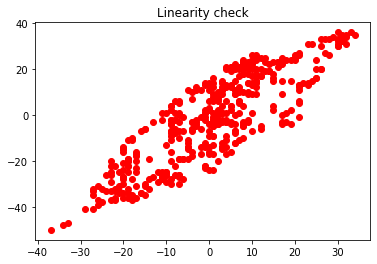

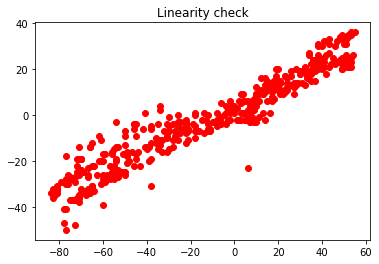

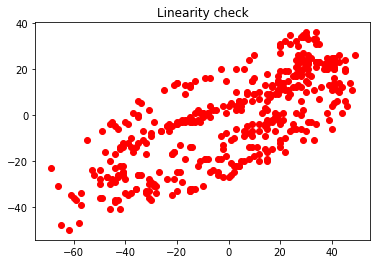

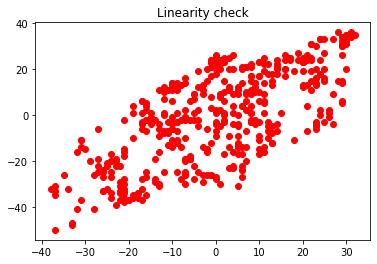

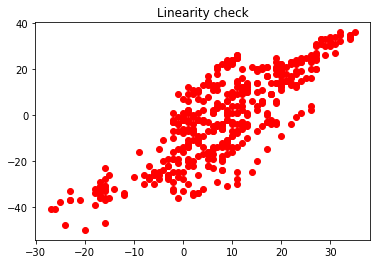

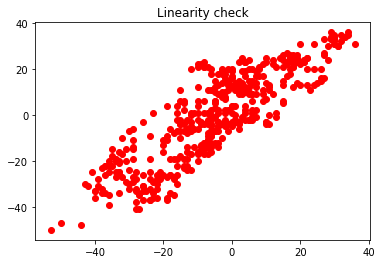

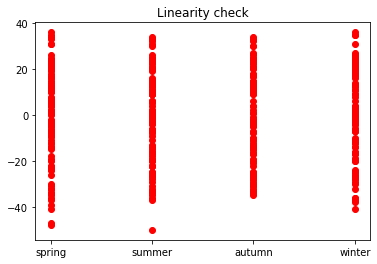

In [9]:
for l in df.columns[3:]:
    plt.plot(df[l],df['ConsumerConfidence_1'], 'ro')
    #plt.xlabel('l')
    #plt.ylabel('ConsumerConfidence_1')
    plt.title('Linearity check')
    plt.show()

In [10]:
x= df[['EconomicClimate_2','WillingnessToBuy_3', 'EconomicSituationLast12Months_4',
       'EconomicSituationNext12Months_5', 'FinancialSituationLast12Months_6',
       'FinancialSituationNext12Months_7', 'RightTimeToMakeLargePurchases_8']]
x = sm.add_constant(x) 
y = df['ConsumerConfidence_1']

model = sm.OLS(y,x).fit()
print(model.summary())
print(model.params)

                             OLS Regression Results                             
Dep. Variable:     ConsumerConfidence_1   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 2.514e+05
Date:                  Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                          13:59:11   Log-Likelihood:                -102.48
No. Observations:                   435   AIC:                             221.0
Df Residuals:                       427   BIC:                             253.6
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# 4. Is there a difference in Consumer Confidence Levels in a post-Covid Netherlands? 

In [11]:
df_precov = df.iloc[383:407]
df_postcov = df.iloc[407:]

df_precov = df_precov['ConsumerConfidence_1']
df_postcov = df_postcov['ConsumerConfidence_1']

In [12]:
print(df_precov)
print("")
stat, p = shapiro(df_precov) 
print(f"{norm}: \nStatistic = {stat}, p-value = {p:.2f}")
alpha = 0.05
if p > alpha: 
    print('Data are normally distributed ')
else:
    print('Null rejected. Data are NOT normally distributed') 

383    24
384    25
385    23
386    23
387    23
388    21
389    18
390    15
391    13
392     9
393     1
394    -2
395    -3
396    -3
397    -3
398    -1
399     1
400    -1
401    -2
402    -1
403    -2
404    -2
405    -2
406    -2
Name: ConsumerConfidence_1, dtype: int64

RightTimeToMakeLargePurchases_8: 
Statistic = 0.7719758749008179, p-value = 0.00
Null rejected. Data are NOT normally distributed


In [13]:
print(df_postcov)
print("")
stat, p = shapiro(df_postcov) 
print(f"{norm}: \nStatistic = {stat}, p-value = {p:.2f}")
alpha = 0.05
if p > alpha: 
    print('Data are normally distributed ')
else:
    print('Null rejected. Data are NOT normally distributed') 

407    -3
408   -23
409   -31
410   -27
411   -26
412   -29
413   -28
414   -30
415   -26
416   -19
417   -19
418   -19
419   -18
420   -14
421    -9
422    -3
423    -4
424    -6
425    -5
426   -10
427   -19
428   -25
429   -28
430   -30
431   -39
432   -48
433   -47
434   -50
Name: ConsumerConfidence_1, dtype: int64

RightTimeToMakeLargePurchases_8: 
Statistic = 0.9436969757080078, p-value = 0.14
Data are normally distributed 


In [14]:
test = mannwhitneyu(df_postcov, df_precov)
print(test)
if test[1] < 0.05: 
    print("Result is significant")

MannwhitneyuResult(statistic=3.0, pvalue=9.760096345887683e-10)
Result is significant
